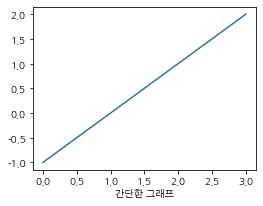

In [3]:
# 그래프 테스트
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [4]:
#2022-06-15 ~ 2023-01-11 까지 몸무게 증량 운동기록(하체) 불러오기
df = pd.read_csv('csv\Diet_Upper_body.csv')

# 데이터타입, 결측치, 데이터 요약, 이상치 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18 non-null     int64  
 1   DateTime          18 non-null     object 
 2   Weight(kg)        18 non-null     float64
 3   Pendlay_row(kg)   18 non-null     float64
 4   OHP(kg)           18 non-null     float64
 5   Rest_Period(day)  18 non-null     int64  
 6   Workout_time      18 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.1+ KB


,ID,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,30.500000,73.366667,99.294444,70.511111,3.833333,1.277778
std,5.338539,3.020713,5.620495,1.767980,2.455486,0.826442
min,22.000000,69.200000,92.500000,67.500000,2.000000,0.000000
25%,26.250000,70.250000,93.125000,69.125000,3.000000,1.000000
50%,30.500000,74.150000,101.500000,70.500000,3.000000,1.500000
75%,34.750000,75.425000,103.500000,72.000000,3.750000,2.000000
max,39.000000,78.600000,106.800000,73.000000,12.000000,2.000000


In [5]:
# DateTime 형변환
df['DateTime'] = df['DateTime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18 non-null     int64         
 1   DateTime          18 non-null     datetime64[ns]
 2   Weight(kg)        18 non-null     float64       
 3   Pendlay_row(kg)   18 non-null     float64       
 4   OHP(kg)           18 non-null     float64       
 5   Rest_Period(day)  18 non-null     int64         
 6   Workout_time      18 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.1 KB


In [6]:
# 체중 대비 OHP, 바벨 로우 중량을 알아보기 위한 컬럼 만들기
df['OHP_Weight_per_kg'] =   df['OHP(kg)'] / df['Weight(kg)']
df['Pendlay_row_Weight_per_kg'] = df['Pendlay_row(kg)'] / df['Weight(kg)']

#소수 둘째자리까지 출력
df['OHP_Weight_per_kg'] = df['OHP_Weight_per_kg'].round(2)
df['Pendlay_row_Weight_per_kg'] = df['Pendlay_row_Weight_per_kg'].round(2)
df.head()

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
0,22,2022-12-24,78.6,103.0,70.0,3,0,0.89,1.31
1,23,2022-12-31,77.5,100.0,70.0,3,0,0.90,1.29
2,24,2023-01-10,76.3,103.0,70.0,2,2,0.92,1.35
3,25,2023-01-18,76.0,103.5,72.0,5,2,0.95,1.36
4,26,2023-01-23,75.2,103.5,72.0,2,1,0.96,1.38


In [7]:
# OHP 중량 순으로 정렬
df.sort_values('OHP(kg)', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
7,29,2023-02-19,75.1,106.5,73.0,3,2,0.97,1.42
8,30,2023-02-27,74.5,106.5,73.0,3,1,0.98,1.43
5,27,2023-01-31,75.5,103.5,72.5,3,2,0.96,1.37


In [8]:
# 바벨로우 중량 순으로 정렬
df.sort_values('Pendlay_row(kg)', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
6,28,2023-02-12,74.7,106.8,69.5,3,1,0.93,1.43
7,29,2023-02-19,75.1,106.5,73.0,3,2,0.97,1.42
8,30,2023-02-27,74.5,106.5,73.0,3,1,0.98,1.43


In [9]:
# 체중 대비 OHP 중량 순으로 정렬
df.sort_values('OHP_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
15,37,2023-04-26,69.7,95.0,71.0,3,2,1.02,1.36
11,33,2023-03-27,71.7,92.5,71.5,3,1,1.00,1.29
10,32,2023-03-19,73.0,95.5,72.2,4,0,0.99,1.31


In [10]:
# 체중 대비 바벨로우 중량 순으로 정렬
df.sort_values('Pendlay_row_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
6,28,2023-02-12,74.7,106.8,69.5,3,1,0.93,1.43
8,30,2023-02-27,74.5,106.5,73.0,3,1,0.98,1.43
7,29,2023-02-19,75.1,106.5,73.0,3,2,0.97,1.42


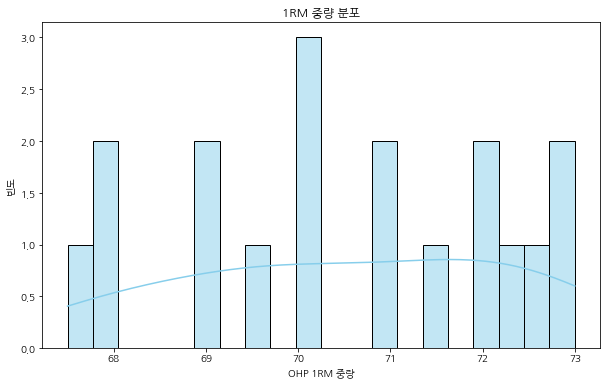

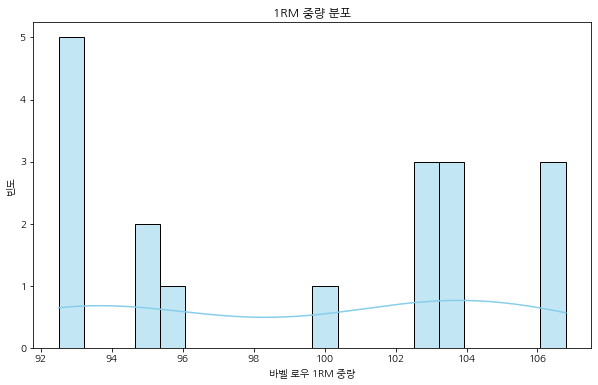

In [11]:
# 스쿼트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['OHP(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('OHP 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

# 데드리프트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['Pendlay_row(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('바벨 로우 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

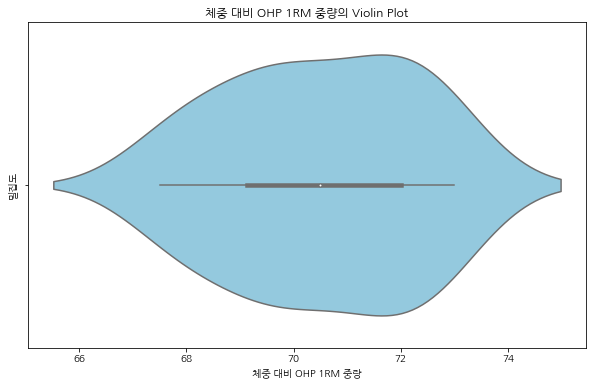

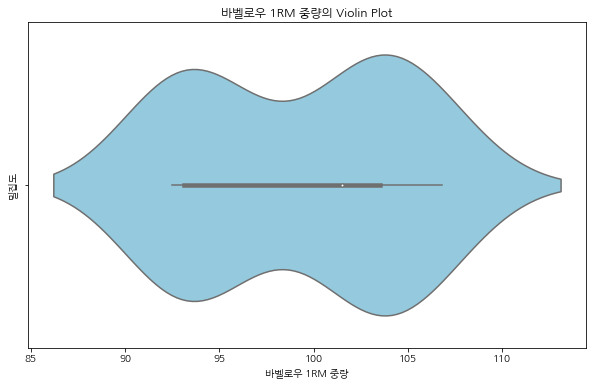

In [12]:
# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['OHP(kg)'], color='skyblue')
plt.xlabel('체중 대비 OHP 1RM 중량')
plt.ylabel('밀집도')
plt.title('체중 대비 OHP 1RM 중량의 Violin Plot')
plt.show()

# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Pendlay_row(kg)'], color='skyblue')
plt.xlabel('바벨로우 1RM 중량')
plt.ylabel('밀집도')
plt.title('바벨로우 1RM 중량의 Violin Plot')
plt.show()

In [13]:
# 상관관계 분석 - 스쿼트

# 스쿼트 중량과 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[OHP]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 OHP 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 OHP 1RM과의 상관관계*')
    else :
        print('*운동시간과 OHP 1RM과의 상관관계*')
    
    stats, pval = pearsonr(df[x],  df['OHP(kg)'])
    print(x+"와 상관계수:", round(stats,4))
    print(x+"의 p-value:", round(pval,10))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')
        
# 상관관계 분석 - 데드리프트

# 데드리프트와 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[바벨로우]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 바벨로우 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 바벨로우 1RM과의 상관관계*')
    else :
        print('*운동시간과 바벨로우 1RM과의 상관관계*')
    stats, pval = pearsonr(df[x],  df['Pendlay_row(kg)'])
    print(x,"와 상관계수:", round(stats,4))
    print(x, "의p-value:", round(pval,10))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')

[OHP]

*몸무게와 OHP 1RM과의 상관관계*
Weight(kg)와 상관계수: 0.5042
Weight(kg)의 p-value: 0.0328696735
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 OHP 1RM과의 상관관계*
Rest_Period(day)와 상관계수: -0.2367
Rest_Period(day)의 p-value: 0.344375384
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 OHP 1RM과의 상관관계*
Workout_time와 상관계수: 0.03
Workout_time의 p-value: 0.9060271061
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

[바벨로우]

*몸무게와 바벨로우 1RM과의 상관관계*
Weight(kg) 와 상관계수: 0.8096
Weight(kg) 의p-value: 4.68904e-05
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 바벨로우 1RM과의 상관관계*
Rest_Period(day) 와 상관계수: -0.4301
Rest_Period(day) 의p-value: 0.0747990288
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 바벨로우 1RM과의 상관관계*
Workout_time 와 상관계수: 0.089
Workout_time 의p-value: 0.7254543405
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.



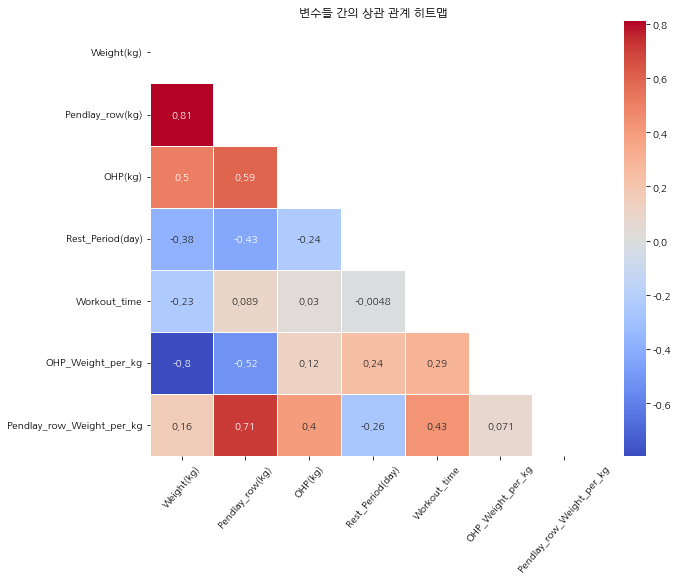

In [14]:
df2 = df.drop(['ID'], axis=1).copy()

# 상관 계수 행렬 계산
correlation_matrix = df2.corr()

# 중복데이터 제거를 위해 대각선 아래쪽 셀 가리기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

# x축 레이블을 45도로 회전
plt.xticks(rotation=50)

plt.title('변수들 간의 상관 관계 히트맵')
plt.show()

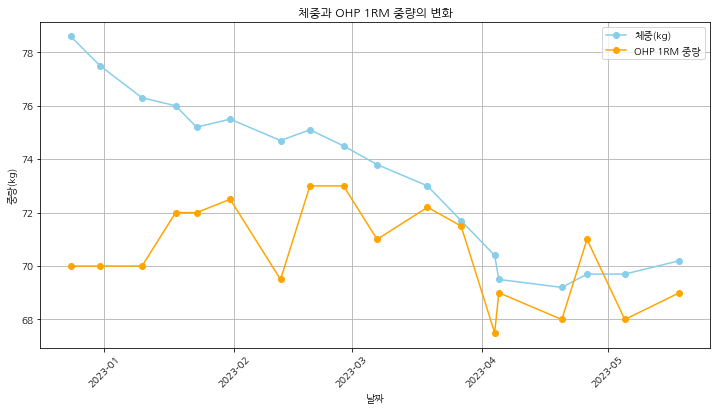

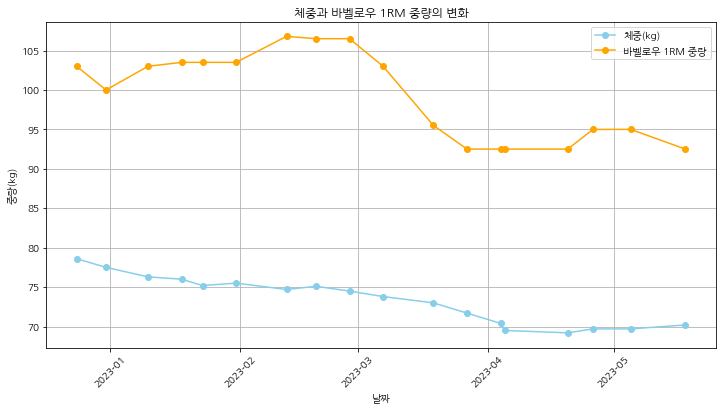

In [15]:
# 트렌드 그래프 그리기

# OHP
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['OHP(kg)'], marker='o', linestyle='-', label='OHP 1RM 중량', color='orange')

plt.xlabel('날짜')
plt.ylabel('중량(kg)')
plt.title('체중과 OHP 1RM 중량의 변화')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()


# 바벨로우
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['Pendlay_row(kg)'], marker='o', linestyle='-', label='바벨로우 1RM 중량', color='orange')

plt.xlabel('날짜')
plt.ylabel('중량(kg)')
plt.title('체중과 바벨로우 1RM 중량의 변화')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()

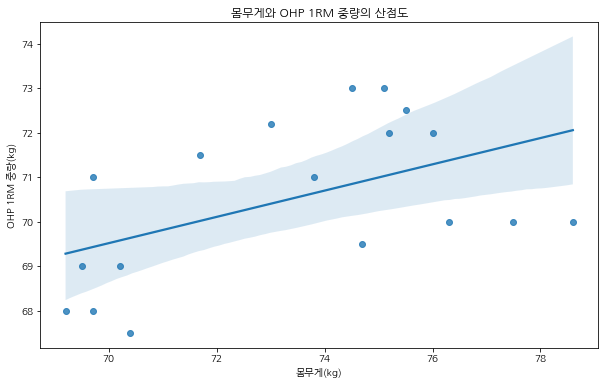

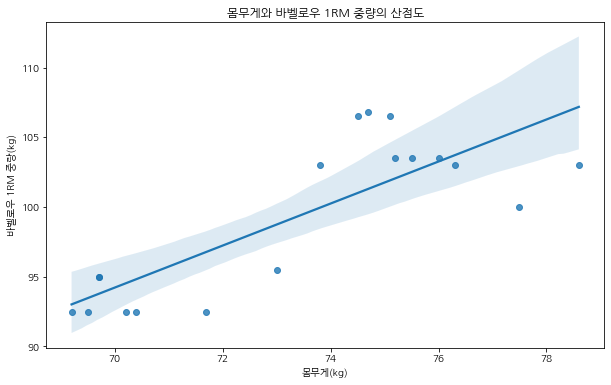

In [16]:
#몸무게와 OHP/바벨로우 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='OHP(kg)')
plt.xlabel('몸무게(kg)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('몸무게와 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='Pendlay_row(kg)')
plt.xlabel('몸무게(kg)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('몸무게와 바벨로우 1RM 중량의 산점도')
plt.show()

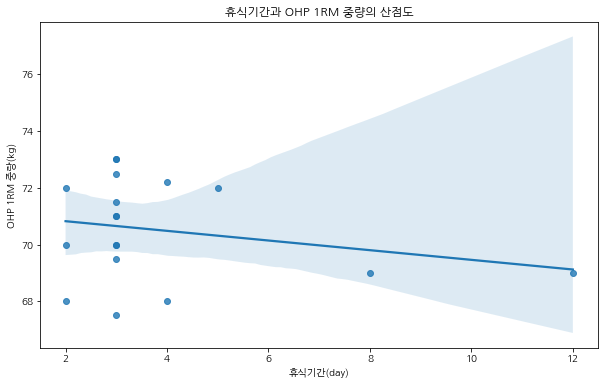

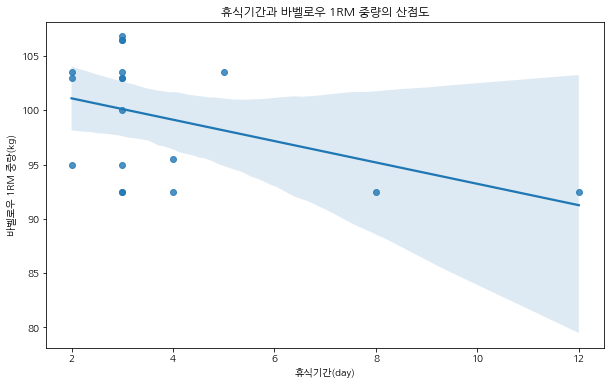

In [17]:
#휴식기간과 OHP/바벨로우 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='OHP(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('휴식기간과 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='Pendlay_row(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('휴식기간과 바벨로우 1RM 중량의 산점도')
plt.show()

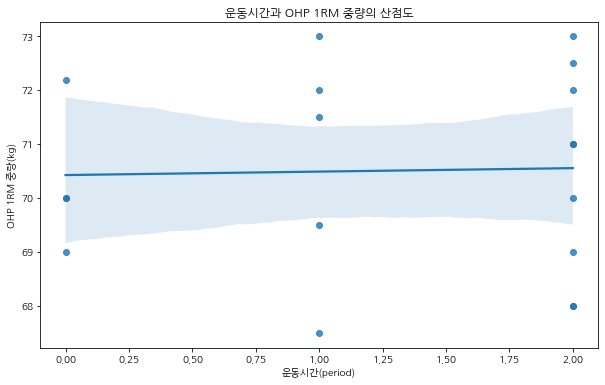

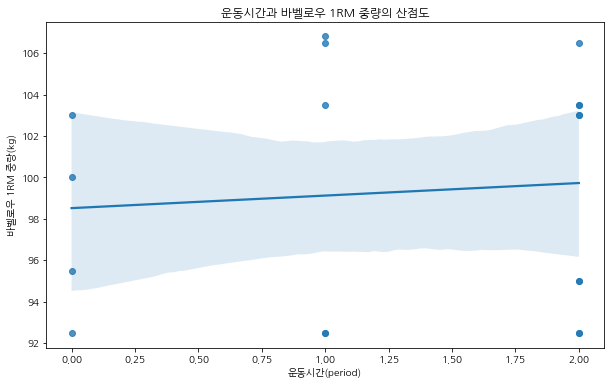

In [18]:
# 휴식기간과 OHP/바벨로우 중량의 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='OHP(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('운동시간과 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='Pendlay_row(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('운동시간과 바벨로우 1RM 중량의 산점도')
plt.show()

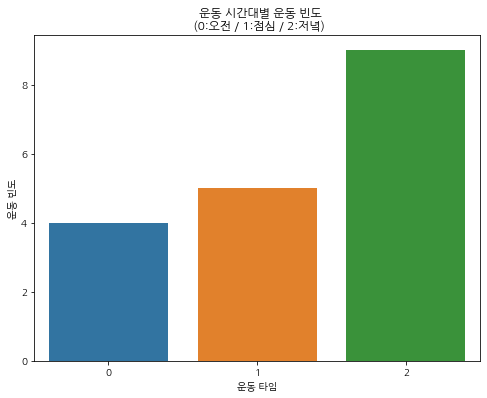

In [19]:
# 운동 시간대별 운동 빈도 분석
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Workout_time')
plt.xlabel('운동 타임')
plt.ylabel('운동 빈도')
plt.title('''   운동 시간대별 운동 빈도 
 (0:오전 / 1:점심 / 2:저녘)''')
plt.show()

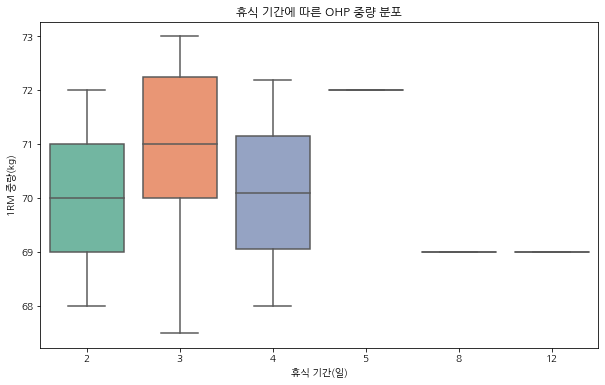

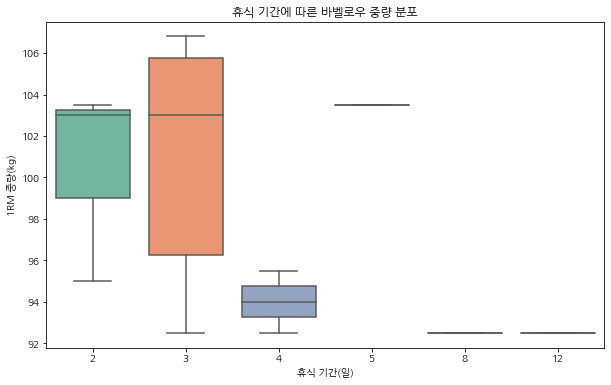

In [20]:
# 휴식 기간에 따른 1RM 중량 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rest_Period(day)', y='OHP(kg)', palette='Set2')
plt.xlabel('휴식 기간(일)')
plt.ylabel('1RM 중량(kg)')
plt.title('휴식 기간에 따른 OHP 중량 분포')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rest_Period(day)', y='Pendlay_row(kg)',  palette='Set2')
plt.xlabel('휴식 기간(일)')
plt.ylabel('1RM 중량(kg)')
plt.title('휴식 기간에 따른 바벨로우 중량 분포')

plt.show()